# **Preprocess the Data**



In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Connect with drive
from google.colab import drive

drive.mount('/content/drive',  force_remount=True)

Mounted at /content/drive


In [3]:
# Import dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/synthetic_online_retail_data.csv')

In [4]:
print(df.head())

   customer_id  order_date  product_id  category_id       category_name  \
0        13542  2024-12-17         784           10         Electronics   
1        23188  2024-06-01         682           50   Sports & Outdoors   
2        55098  2025-02-04         684           50   Sports & Outdoors   
3        65208  2024-10-28         204           40  Books & Stationery   
4        63872  2024-05-10         202           20             Fashion   

  product_name  quantity   price payment_method            city  review_score  \
0   Smartphone         2  373.36    Credit Card  New Oliviaberg           1.0   
1  Soccer Ball         5  299.34    Credit Card    Port Matthew           NaN   
2         Tent         5   23.00    Credit Card      West Sarah           5.0   
3   Story Book         2  230.11  Bank Transfer  Hernandezburgh           5.0   
4        Skirt         4  176.72    Credit Card    Jenkinshaven           1.0   

  gender  age  
0      F   56  
1      M   59  
2      F   64 

In [5]:
print(df)

     customer_id  order_date  product_id  category_id       category_name  \
0          13542  2024-12-17         784           10         Electronics   
1          23188  2024-06-01         682           50   Sports & Outdoors   
2          55098  2025-02-04         684           50   Sports & Outdoors   
3          65208  2024-10-28         204           40  Books & Stationery   
4          63872  2024-05-10         202           20             Fashion   
..           ...         ...         ...          ...                 ...   
995        67967  2024-05-04         965           40  Books & Stationery   
996        99828  2024-09-12         510           40  Books & Stationery   
997        92290  2024-11-06         445           10         Electronics   
998        61427  2024-09-17         410           10         Electronics   
999        20658  2024-11-06         177           40  Books & Stationery   

    product_name  quantity   price    payment_method            city  \
0  

In [6]:
# Displaying DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [7]:
# Displaying DataFrame column data types
df.dtypes

,0
customer_id,int64
order_date,object
product_id,int64
category_id,int64
category_name,object
product_name,object
quantity,int64
price,float64
payment_method,object
city,object


In [8]:
print(df.describe())

        customer_id   product_id  category_id     quantity        price  \
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   55490.723000   540.726000    30.030000     2.947000   251.850660   
std    25910.185857   261.737704    14.370303     1.413573   139.194688   
min    10201.000000   100.000000    10.000000     1.000000    10.720000   
25%    33857.000000   311.750000    20.000000     2.000000   128.525000   
50%    54619.500000   542.500000    30.000000     3.000000   250.220000   
75%    77848.500000   770.750000    40.000000     4.000000   366.467500   
max    99923.000000   995.000000    50.000000     5.000000   499.500000   

       review_score          age  
count    799.000000  1000.000000  
mean       3.992491    46.382000  
std        1.239469    16.569992  
min        1.000000    18.000000  
25%        3.000000    32.000000  
50%        4.000000    47.000000  
75%        5.000000    61.000000  
max        5.000000    75.000000  


In [10]:
# Convert date columns
df['InvoiceDate'] = pd.to_datetime(df['order_date'])

In [13]:
# Drop nulls values
df.dropna(subset=['customer_id', 'product_id', 'order_date', 'category_name', 'product_name', 'quantity', 'price'], inplace=True)


In [14]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [16]:
# Create derived columns
df['TotalPrice'] = df['quantity'] * df['price']
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['Week'] = df['InvoiceDate'].dt.isocalendar().week
df['Year'] = df['InvoiceDate'].dt.year
df['Quarter'] = df['InvoiceDate'].dt.quarter

In [17]:
print(df)

     customer_id  order_date  product_id  category_id       category_name  \
0          13542  2024-12-17         784           10         Electronics   
1          23188  2024-06-01         682           50   Sports & Outdoors   
2          55098  2025-02-04         684           50   Sports & Outdoors   
3          65208  2024-10-28         204           40  Books & Stationery   
4          63872  2024-05-10         202           20             Fashion   
..           ...         ...         ...          ...                 ...   
995        67967  2024-05-04         965           40  Books & Stationery   
996        99828  2024-09-12         510           40  Books & Stationery   
997        92290  2024-11-06         445           10         Electronics   
998        61427  2024-09-17         410           10         Electronics   
999        20658  2024-11-06         177           40  Books & Stationery   

    product_name  quantity   price    payment_method            city  \
0  

#  **1. Sales Trend**

    Week  TotalPrice
0      1    12537.34
1      2     8190.14
2      3     9450.54
3      4    16469.51
4      5    19536.86
5      6    14846.26
6      7     8469.46
7      8    12549.77
8      9    12965.44
9     10    12478.18
10    11    13506.04
11    12    17316.35
12    13    18252.12
13    14    12916.11
14    15    10546.33
15    16    11836.34
16    17    12587.06
17    18    11072.52
18    19    10448.91
19    20    14366.01
20    21    15038.83
21    22    19432.04
22    23    11504.58
23    24    18734.76
24    25     6061.36
25    26    16406.13
26    27    15186.73
27    28    11146.65
28    29     8678.82
29    30    17020.98
30    31    14734.96
31    32     9895.18
32    33    33000.45
33    34    12218.45
34    35    16392.65
35    36    10229.75
36    37    15034.74
37    38    17445.28
38    39    24374.28
39    40     8787.40
40    41    13890.13
41    42    11313.88
42    43    15104.05
43    44    10834.64
44    45    13101.51
45    46    19139.22
46    47    1

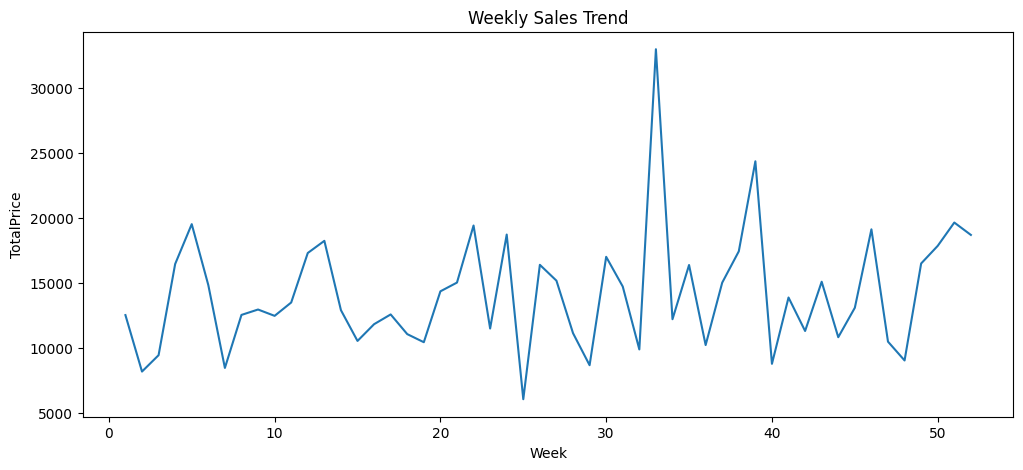

In [19]:
# Weekly Sales
weekly_sales = df.groupby('Week')['TotalPrice'].sum().reset_index()
print(weekly_sales)

plt.figure(figsize=(12, 5))
sns.lineplot(data=weekly_sales, x='Week', y='TotalPrice')
plt.title('Weekly Sales Trend')
plt.show()

      Month  TotalPrice
0   2024-03    30620.98
1   2024-04    50375.40
2   2024-05    61448.18
3   2024-06    59127.40
4   2024-07    57939.86
5   2024-08    79070.12
6   2024-09    69323.09
7   2024-10    55328.98
8   2024-11    55404.74
9   2024-12    78432.94
10  2025-01    60210.83
11  2025-02    48826.04
12  2025-03    31218.32


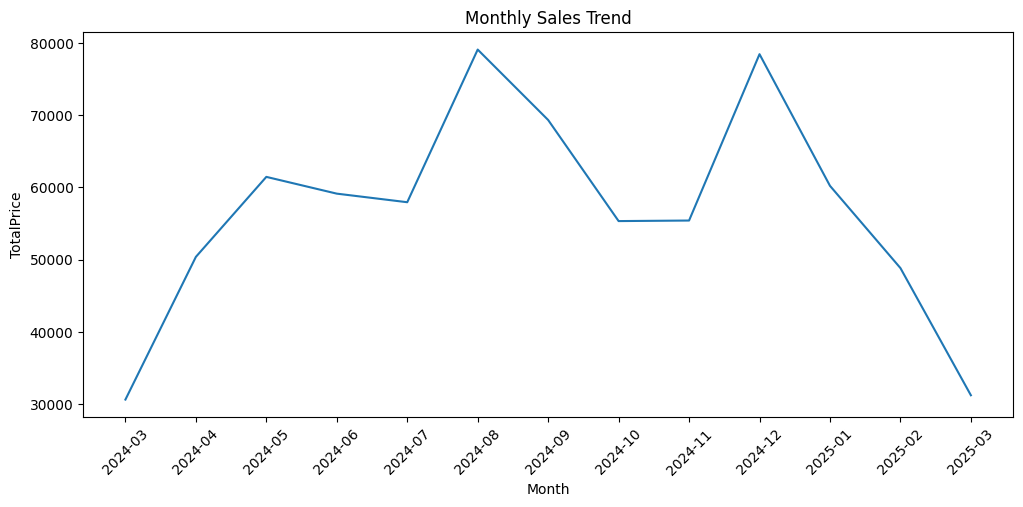

In [21]:
# Monthly Sales
monthly_sales = df.groupby('Month')['TotalPrice'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
print(monthly_sales)

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.show()


   Year  TotalPrice
0  2024   597071.69
1  2025   140255.19


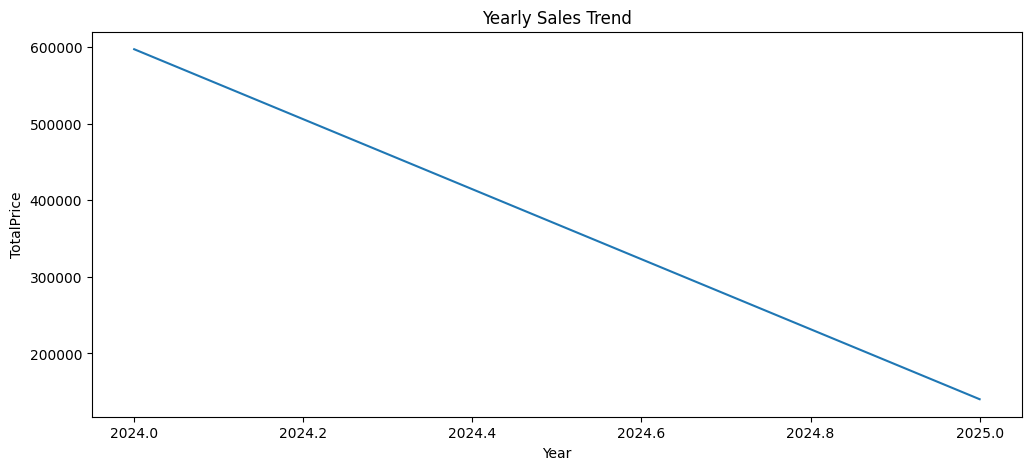

In [23]:
# yearly sales
yearly_sales = df.groupby('Year')['TotalPrice'].sum().reset_index()
print(yearly_sales)

plt.figure(figsize=(12, 5))
sns.lineplot(data=yearly_sales, x='Year', y='TotalPrice')
plt.title('Yearly Sales Trend')
plt.show()



        Year  TotalPrice
0  49.987651   80.977882
1  50.012349   19.022118


<Figure size 1400x800 with 0 Axes>

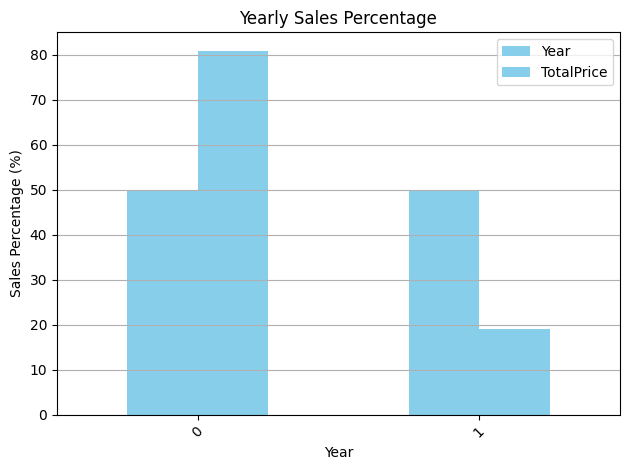

In [30]:
# yearly sales in percentage
total_sales = yearly_sales.sum()
yearly_sales_percentage = (yearly_sales / total_sales) * 100
print(yearly_sales_percentage)


plt.figure(figsize=(14, 8))
yearly_sales_percentage.plot(kind='bar', color='skyblue')

plt.title('Yearly Sales Percentage')
plt.xlabel('Year')
plt.ylabel('Sales Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


   Year  Quarter  TotalPrice
0  2024        1    30620.98
1  2024        2   170950.98
2  2024        3   206333.07
3  2024        4   189166.66
4  2025        1   140255.19


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2024'),
  Text(1, 0, '2024'),
  Text(2, 0, '2024'),
  Text(3, 0, '2024'),
  Text(4, 0, '2025')])

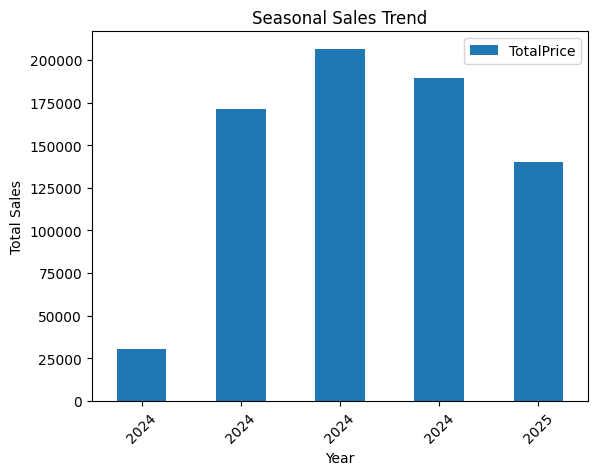

In [33]:
# Seasonal sales trend
seasonal_sales = df.groupby(['Year', 'Quarter'])['TotalPrice'].sum().reset_index()
print(seasonal_sales)

seasonal_sales.plot(x='Year', y='TotalPrice', kind='bar', stacked=True)
plt.title('Seasonal Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

In [38]:
# monthly sales growth rate
monthly_sales['GrowthRate'] = monthly_sales['TotalPrice'].pct_change() * 100
print(monthly_sales[['Month', 'GrowthRate']])

      Month  GrowthRate
0   2024-03         NaN
1   2024-04   64.512697
2   2024-05   21.980530
3   2024-06   -3.776808
4   2024-07   -2.008443
5   2024-08   36.469298
6   2024-09  -12.327071
7   2024-10  -20.186795
8   2024-11    0.136926
9   2024-12   41.563592
10  2025-01  -23.232726
11  2025-02  -18.908210
12  2025-03  -36.062150


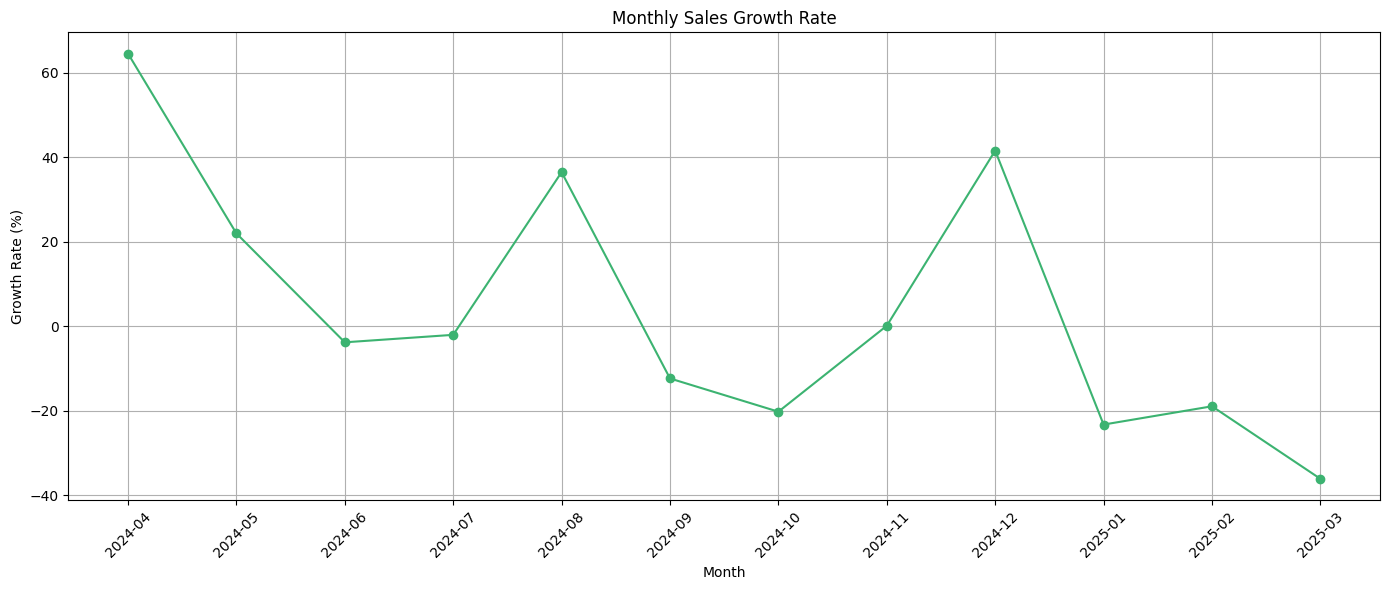

In [39]:

plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['Month'], monthly_sales['GrowthRate'], marker='o', color='mediumseagreen')

plt.title('Monthly Sales Growth Rate')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Product Performance**

product_name
Smartphone     38319.26
Notebook       38027.68
Yoga Mat       37752.08
Soccer Ball    37587.30
Tablet         33581.02
Vase           32191.58
Laptop         32000.38
Smartwatch     31820.10
Headphones     30789.58
T-shirt        30718.54
Name: TotalPrice, dtype: float64


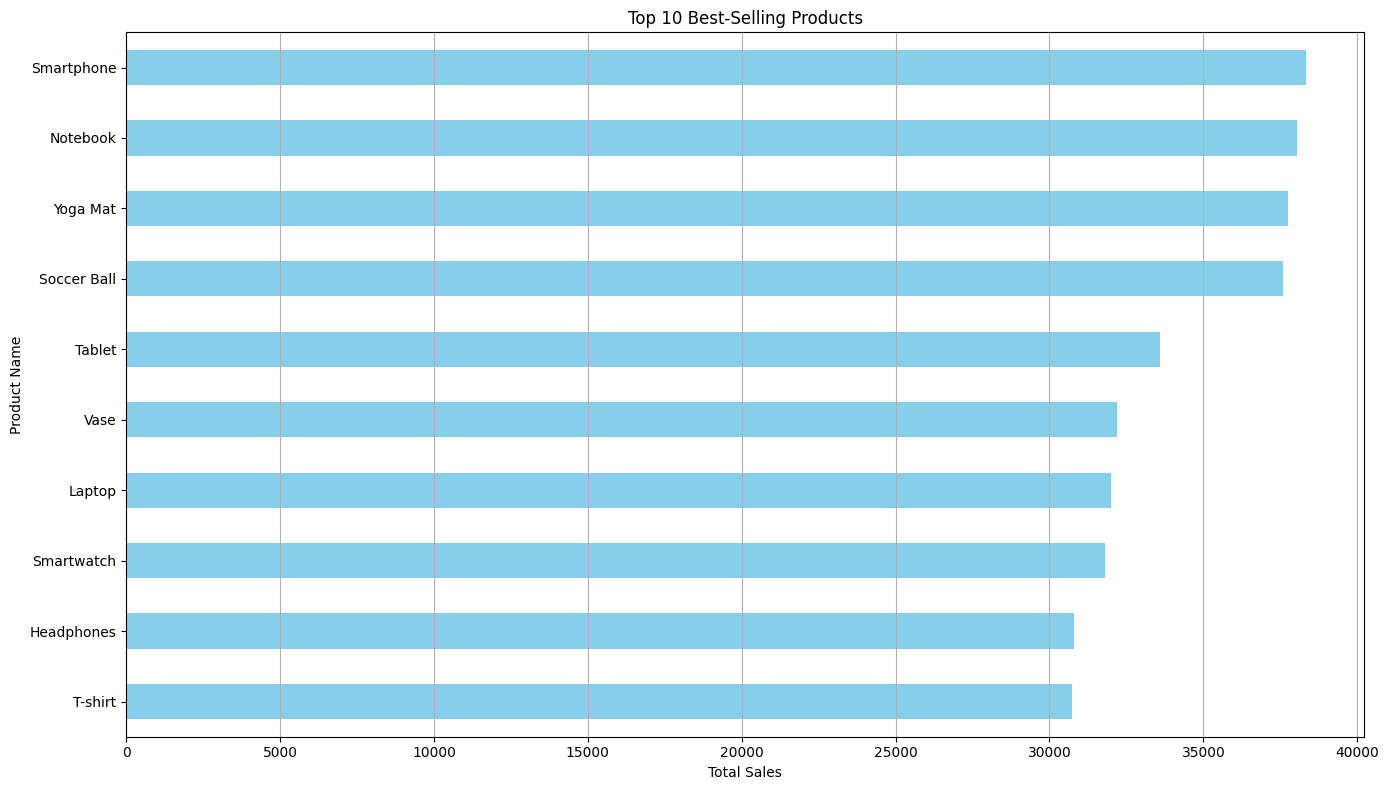

In [51]:
# Best-selling products
best_products = df.groupby('product_name')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(best_products)

plt.figure(figsize=(14, 8))
best_products.plot(kind='barh', color='skyblue')

plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
# Highest sales at the top
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

product_name
Shirt         18230.94
Novel         22750.81
Pen           23273.07
Tent          23449.52
Carpet        24175.74
Dress         25817.21
Blanket       25867.20
Basketball    26282.05
Pillow        27095.93
Story Book    29062.57
Name: TotalPrice, dtype: float64


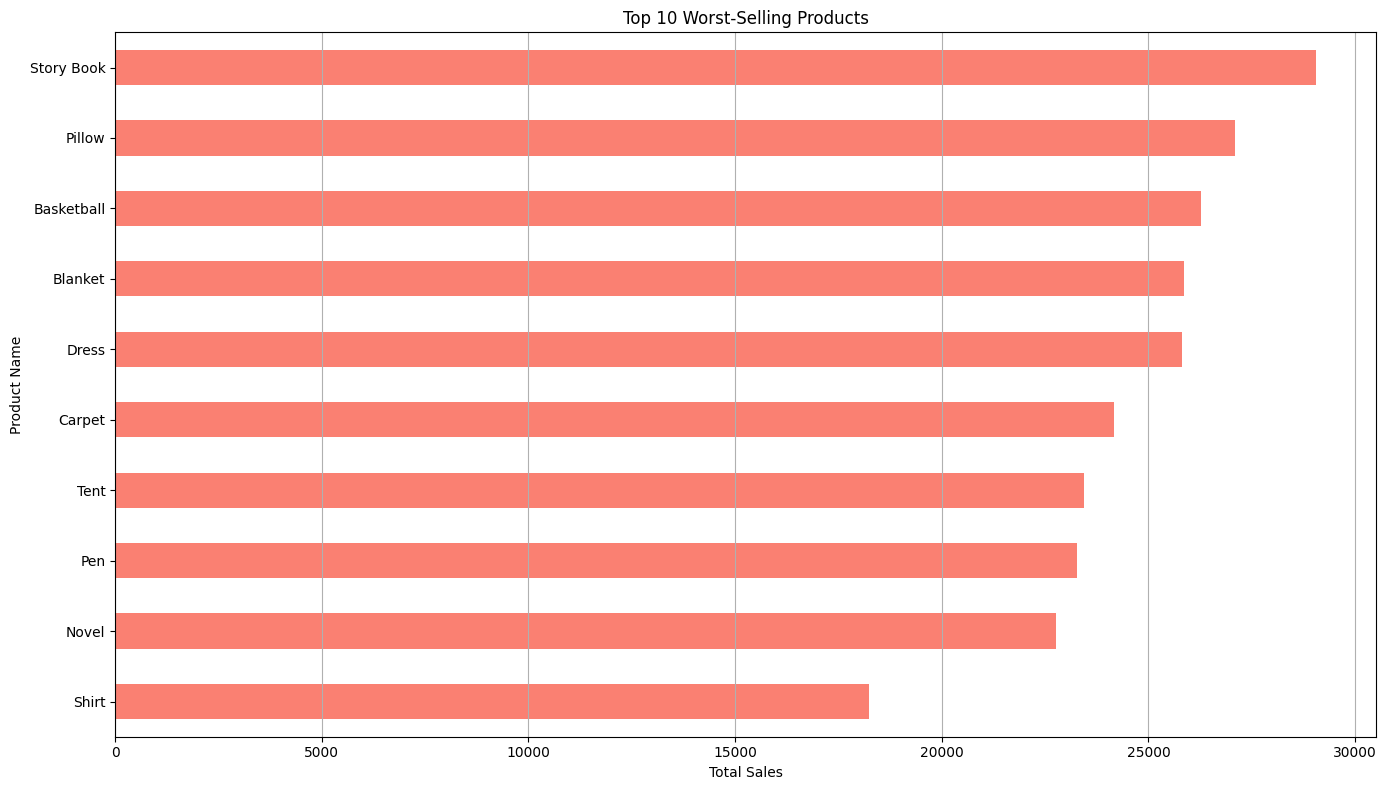

In [56]:
# Worst-selling products
worst_products = df.groupby('product_name')['TotalPrice'].sum().sort_values(ascending=True).head(10)
print(worst_products)

plt.figure(figsize=(14, 8))
worst_products.plot(kind='barh', color='salmon')

plt.title('Top 10 Worst-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

category_name
Electronics           648
Sports & Outdoors     625
Fashion               564
Home & Living         563
Books & Stationery    547
Name: quantity, dtype: int64


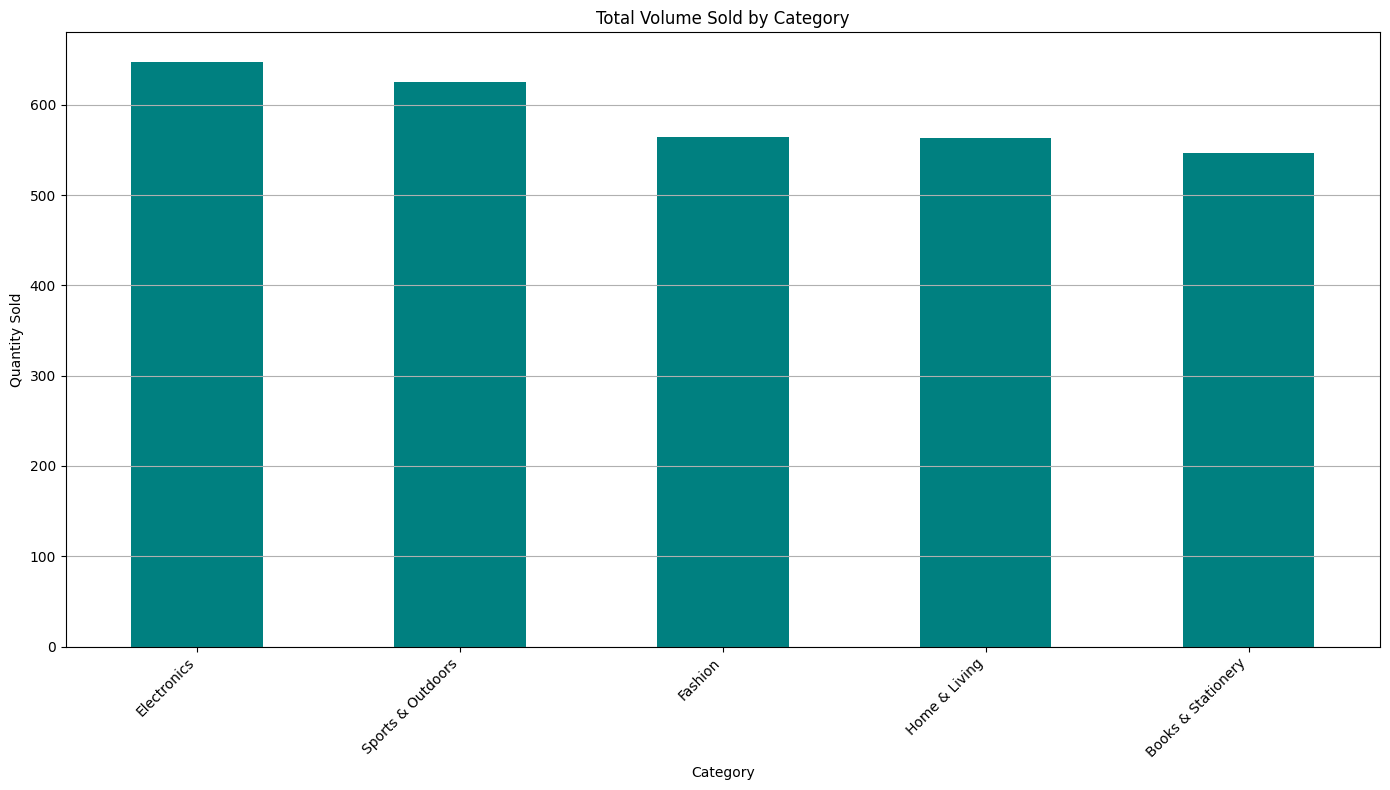

In [59]:
# Volume by brand/category
volume_by_category = df.groupby('category_name')['quantity'].sum().sort_values(ascending=False)
print(volume_by_category)

plt.figure(figsize=(14, 8))
volume_by_category.plot(kind='bar', color='teal')
plt.title('Total Volume Sold by Category')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

product_name
Smartphone       159
Yoga Mat         149
Soccer Ball      137
T-shirt          135
Laptop           134
Notebook         131
Eraser           131
Running Shoes    131
Headphones       128
Vase             128
Name: quantity, dtype: int64


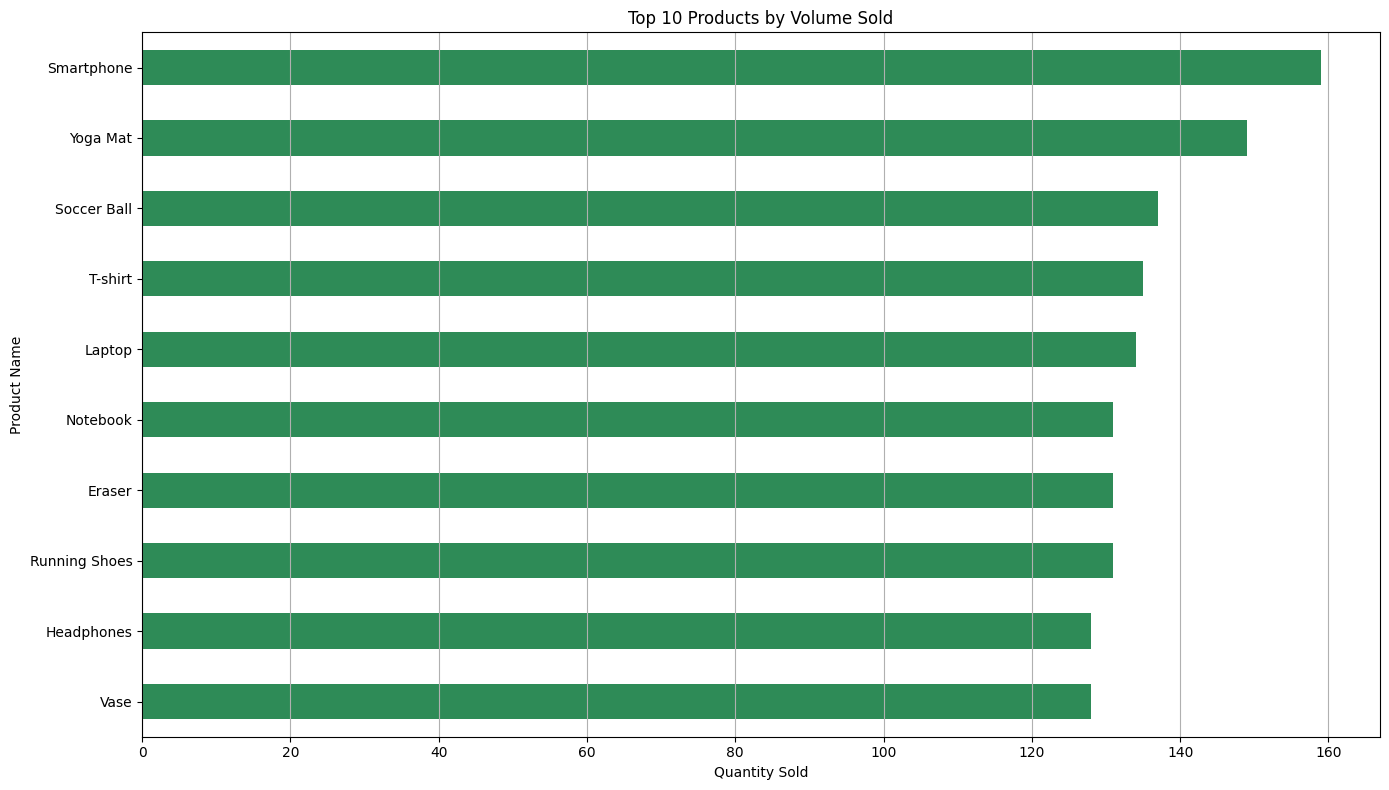

In [60]:
volume_by_product = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)
print(volume_by_product)

plt.figure(figsize=(14, 8))
volume_by_product.plot(kind='barh', color='seagreen')
plt.title('Top 10 Products by Volume Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

product_name
Smartwatch     883.891667
Story Book     880.683939
Notebook       864.265455
Tablet         861.051795
Soccer Ball    835.273333
Vase           825.425128
Smartphone     815.303404
Laptop         800.009500
T-shirt        767.963500
Painting       748.966667
Name: TotalPrice, dtype: float64


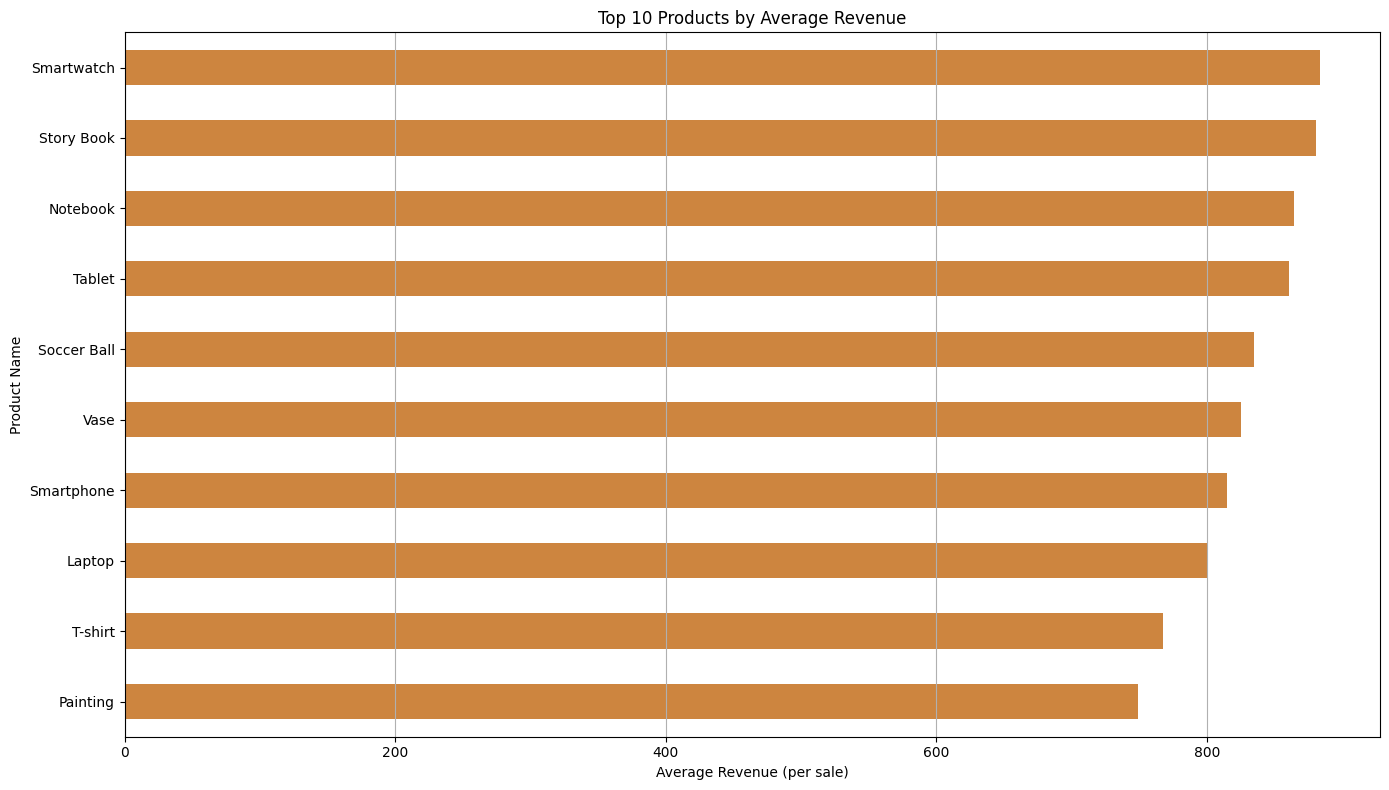

In [63]:
# Avg revenue per product/category
avg_rev_product = df.groupby('product_name')['TotalPrice'].mean().sort_values(ascending=False).head(10)
print(avg_rev_product)

plt.figure(figsize=(14, 8))
avg_rev_product.plot(kind='barh', color='peru')
plt.title('Top 10 Products by Average Revenue')
plt.xlabel('Average Revenue (per sale)')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

category_name
Electronics           804.397778
Books & Stationery    742.049326
Sports & Outdoors     731.498863
Home & Living         725.341099
Fashion               680.376818
Name: TotalPrice, dtype: float64


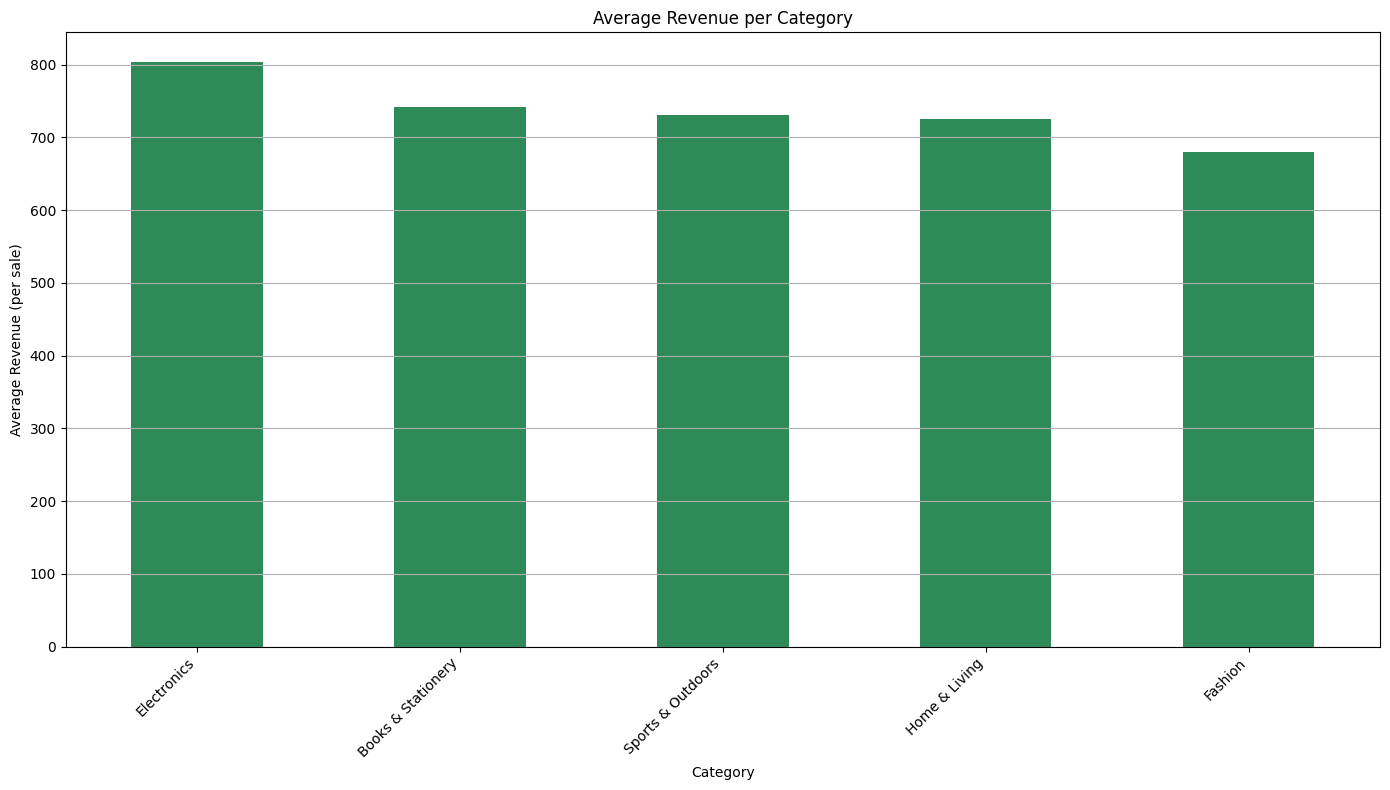

In [64]:
avg_rev_category = df.groupby('category_name')['TotalPrice'].mean().sort_values(ascending=False)
print(avg_rev_category)


plt.figure(figsize=(14, 8))
avg_rev_category.plot(kind='bar', color='seagreen')
plt.title('Average Revenue per Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue (per sale)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


category_name
Electronics           166510.34
Sports & Outdoors     154346.26
Books & Stationery    143215.52
Home & Living         138540.15
Fashion               134714.61
Name: TotalPrice, dtype: float64


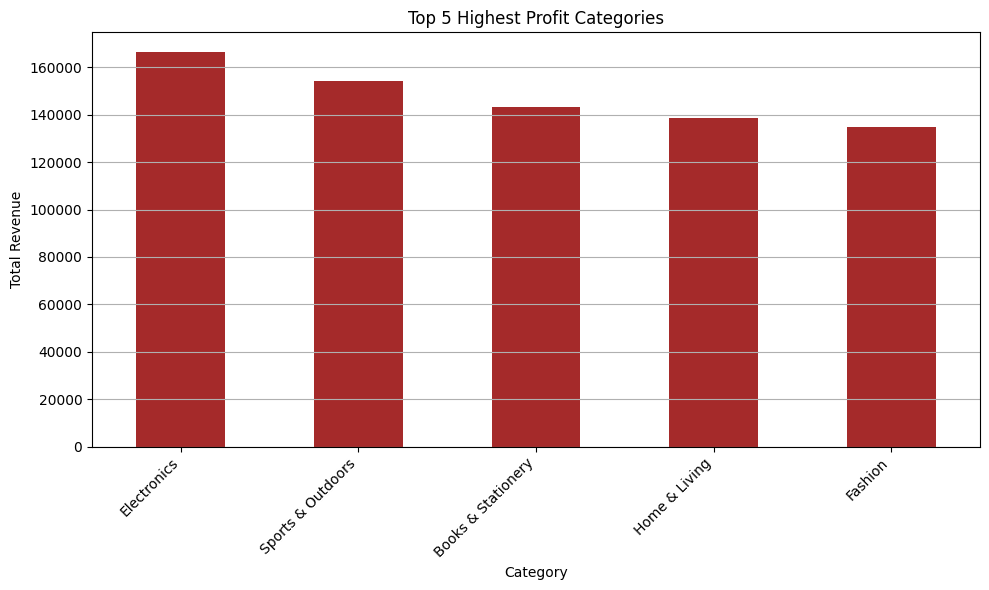

In [66]:
# Highest profit category
profit_category = df.groupby('category_name')['TotalPrice'].sum().sort_values(ascending=False).head()
print(profit_category)

plt.figure(figsize=(10, 6))
profit_category.plot(kind='bar', color='brown')
plt.title('Top 5 Highest Profit Categories')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
